In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# 데이터를 섞고
idx = np.arange(X.shape[0])
np.random.seed(0)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

In [7]:
y

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
params = {
    'hidden_layer_sizes': [(10,), (50,), (100,), #은닉층 1층
                    (10,10), (50,50), (100,100)], #은닉층 2층
    'activation': ['tanh', 'relu'], #활성화 함수
    'alpha': [0.0001, 0.01], #학습률
}
model = MLPClassifier(random_state=0, max_iter=5000)
clf = GridSearchCV(model, param_grid=params, cv=3)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_estimator_)

0.9733333333333333
MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=5000,
              random_state=0)


In [6]:
from sklearn.model_selection import train_test_split
#학습용, 검증용 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# generator
# 메모리는 절약할 수 있지만 실행시간이 더 오래 걸릴 수 있음
def make_numbers(n):
    while n < 6:
        yield n # 메모리에 저장하지 않고 호출한 곳으로 값을 보냄(return과 비슷한 역할)
        n += 1

for i in make_numbers(0):
    print(i)

0
1
2
3
4
5


In [20]:
import sys
#리스트의 데이터가 늘어나면 메모리 사용량이 증가한다.
#리스트의 모든 데이터를 메모리에 적재
a = [i for i in range(100)]
print(sys.getsizeof(a))
b = [i for i in range(1000)]
print(sys.getsizeof(b))
#generator expression : 위에서 언급한 generator 함수를 좀더 쉽게 사용할 수 있도록 제공되는 표현식
#[] 대신 ()을 사용하면 메모리를 효율적으로 사용할 수 있음
#모든 데이터를 메모리에 적재하지 않고 next() 함수를 통해 조금씩 메모리에 적재
c = (i for i in range(100))
print(sys.getsizeof(c))
d = (i for i in range(1000))
print(sys.getsizeof(d))

920
8856
112
112


In [25]:
import time
def func_sleep(x):
    print('1초 멈춤...')
    time.sleep(1)
    return x

In [23]:
# 리스트
items1 = [func_sleep(x) for x in range(5)]
items1

1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...


[0, 1, 2, 3, 4]

In [24]:
# generator 생성
items2 = (func_sleep(y) for y in range(5))
items2

<generator object <genexpr> at 0x000002685DF8A580>

In [11]:
%%time
#리스트를 사용하면 리스트의 모든 원소를 한꺼번에 처리한 후 최종 결과가 출력됨
for i in items1:
    print(i)

0
1
2
3
4
Wall time: 0 ns


In [12]:
%%time
#generator를 사용하면 수행 시간이 긴 연산을 한꺼번에 수행하지 않고 조금씩 수행함
for i in items2:
    print(i)

1초 멈춤...
0
1초 멈춤...
1
1초 멈춤...
2
1초 멈춤...
3
1초 멈춤...
4
Wall time: 5.04 s


In [14]:
print('메모리 사용량:',sys.getsizeof(items1))
print('메모리 사용량:',sys.getsizeof(items2))

메모리 사용량: 120
메모리 사용량: 112


In [15]:
#batch(X_train, y_train, 10)
#전체 데이터를 보내지 않고 10개씩 조금씩 보내서 처리하는 방식
def batch(X1, y1, n):
    x_size=len(X1)
    for idx in range(0, x_size, n):
        yield X1[idx:min(idx + n, x_size)], y1[idx:min(idx + n, x_size)]

clf=MLPClassifier(max_iter=5000, random_state=0)

In [16]:
#일반적인 방식(한꺼번에 처리하는 방식)
from sklearn.metrics import accuracy_score
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

In [17]:
#10개씩 12회로 나누어 처리하는 방식
clf2 = MLPClassifier(random_state=0)
#시간은 더 오래 걸릴 수 있으나 메모리를 절약할 수 있는 방법
points_tr=[]
points_te=[]
samp = batch(X_train, y_train, 10)
for idx, (chunk_X, chunk_y) in enumerate(samp):
    print(idx)
    #부분적으로 학습, 처음에는 정확도가 낮지만 점차 향상됨
    clf2.partial_fit(chunk_X, chunk_y, classes=[0, 1, 2])
    pred = clf2.predict(X_train)
    point=accuracy_score(y_train, pred)
    points_tr.append(point)
    print('학습용:',point)
    pred = clf2.predict(X_test)
    point=accuracy_score(y_test, pred)
    points_te.append(point)
    print('검증용:',point)

0
학습용: 0.48333333333333334
검증용: 0.5
1
학습용: 0.525
검증용: 0.5333333333333333
2
학습용: 0.6416666666666667
검증용: 0.6333333333333333
3
학습용: 0.725
검증용: 0.7
4
학습용: 0.7833333333333333
검증용: 0.7333333333333333
5
학습용: 0.825
검증용: 0.7666666666666667
6
학습용: 0.8416666666666667
검증용: 0.7666666666666667
7
학습용: 0.8333333333333334
검증용: 0.8
8
학습용: 0.85
검증용: 0.8
9
학습용: 0.8583333333333333
검증용: 0.8
10
학습용: 0.8583333333333333
검증용: 0.8
11
학습용: 0.8583333333333333
검증용: 0.8


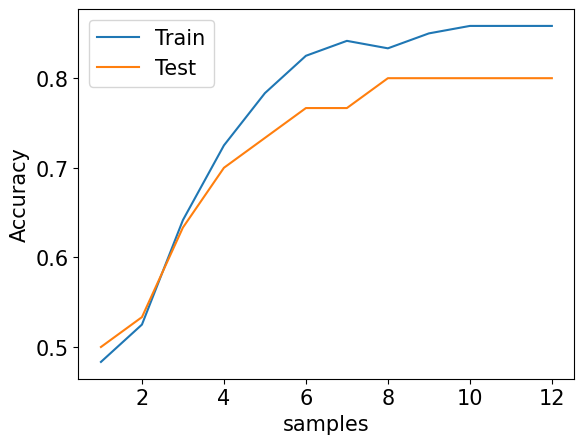

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"]=15
plt.plot(range(1,13), points_tr, label="Train")
plt.plot(range(1,13), points_te, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("samples")
plt.legend()